<div style="text-align: center"> <h1> Assignment - 6</div>

<div style="text-align: center"> <h3>CS677 A1 Data Science with Python (Fall 2024)

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>

### **Part - 1 Stocks: KNN**

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [3]:
df = pd.read_excel("META_weekly_return_detailed.xlsx")

In [4]:
# Looking at the dataframe
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,Label
0,358.989990,360.000000,351.820007,353.959992,352.897461,14980500,-1.217,2023-12-29,52,2023,29,Friday,0.0430,0.889220,Green
1,359.700012,361.899994,357.809998,358.320007,357.244385,11798800,0.137,2023-12-28,52,2023,28,Thursday,0.0430,0.889220,Green
2,356.070007,359.000000,355.309998,357.829987,356.755859,13207900,0.845,2023-12-27,52,2023,27,Wednesday,0.0430,0.889220,Green
3,354.989990,356.980011,353.450012,354.829987,353.764832,9898600,0.407,2023-12-26,52,2023,26,Tuesday,0.0430,0.889220,Green
4,355.579987,357.200012,351.220001,353.390015,352.329193,11764200,-0.198,2023-12-22,51,2023,22,Friday,1.0866,1.349914,Green


##### **Solution - 1**

In [5]:
!pip install -q scikit-learn pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [6]:
df_train = df[df['Year'] == 2022]
df_test = df[df['Year'] == 2023]

In [7]:
print(df_train['Label'].unique())
print(df_test['Label'].unique())


['Green' 'Red']
['Green' 'Red']


In [8]:
X_train = df_train[['mean_return', 'volatility']].values
y_train = df_train['Label'].values
X_test = df_test[['mean_return', 'volatility']].values
y_test = df_test['Label'].values

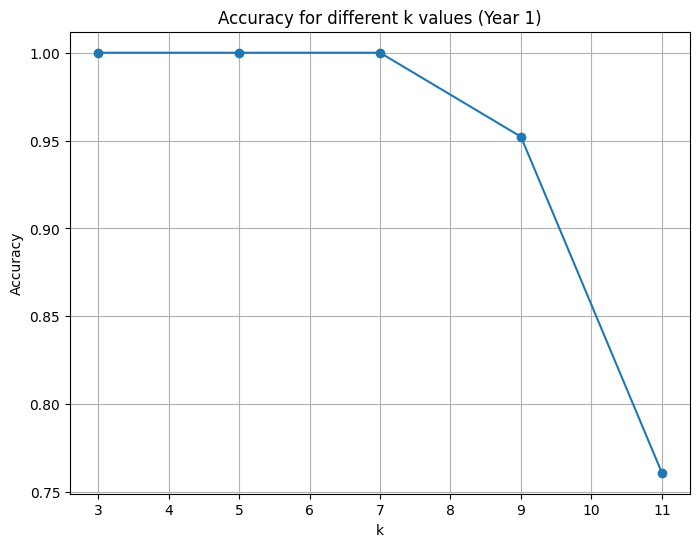

Optimal k for year 1: 3


In [9]:
# Part 1: Find optimal value of k based on accuracy for year 1 data
k_values = [3, 5, 7, 9, 11]
accuracy_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred)
    accuracy_values.append(accuracy)

# Plot k vs accuracy for year 1
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy for different k values (Year 1)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the optimal k (highest accuracy)
optimal_k = k_values[np.argmax(accuracy_values)]
print(f"Optimal k for year 1: {optimal_k}")

##### **Solution - 2**

In [10]:
# Part 2: Use the optimal value of k for year 2 predictions
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

# Compute accuracy for year 2
accuracy_year2 = accuracy_score(y_test, y_test_pred)
print(f"Accuracy for year 2 with k = {optimal_k}: {accuracy_year2:.4f}")

Accuracy for year 2 with k = 3: 0.6200


##### **Solution - 3**

Confusion Matrix for 2023:
Predicted  Green  Red
Actual               
Green        115   49
Red           46   40


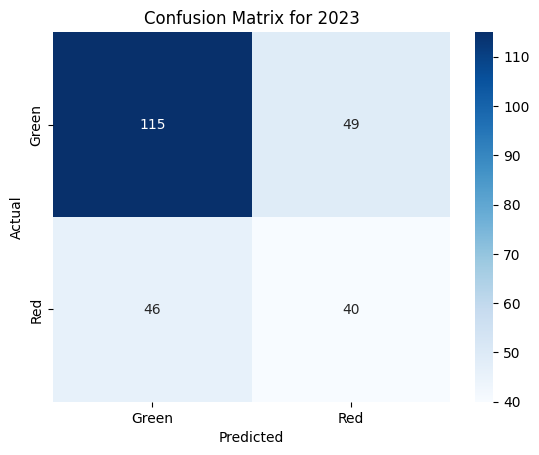

In [11]:
confusion_matrix_2023 = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix for 2023:")
print(confusion_matrix_2023)

import seaborn as sns
sns.heatmap(confusion_matrix_2023, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for 2023')
plt.show()

In [12]:
tn, fp,fn, tp = confusion_matrix_2023.values.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)


print(f"True Positive Rate (TPR) (Sensitivity / Recall) year 2023: {tpr}")
print(f"True Negative Rate (TNR) (Specificity)  year 2023: {tnr}")
print(f"False Positive Rate (FPR) year 2023: {fpr}")
print(f"False Negative Rate (FNR): {fnr}")

True Positive Rate (TPR) (Sensitivity / Recall) year 2023: 0.46511627906976744
True Negative Rate (TNR) (Specificity)  year 2023: 0.7012195121951219
False Positive Rate (FPR) year 2023: 0.29878048780487804
False Negative Rate (FNR): 0.5348837209302325


##### **Solution - 5**

In [13]:
# Part 5: Trading strategy based on year 2 labels and comparison with buy-and-hold strategy
# Initialize capital for both strategies
initial_capital = 100  # Starting with $100
buy_and_hold_return = (df_test['Adj Close'].iloc[-1] / df_test['Adj Close'].iloc[0]) * initial_capital

# Trading strategy based on predicted labels (buy for Green, hold cash for Red)
capital_strategy = initial_capital
for i in range(len(df_test)):
    if y_test_pred[i] == 'Green':
        # Simulate buying and holding till the end of the week
        capital_strategy *= (df_test['Adj Close'].iloc[i] / df_test['Adj Close'].iloc[i-1])

print(f"Buy-and-hold strategy return: ${buy_and_hold_return:.2f}")
print(f"Trading strategy based on k-NN labels return: ${capital_strategy:.2f}")

if capital_strategy > buy_and_hold_return:
    print("The trading strategy based on k-NN labels performs better.")
else:
    print("The buy-and-hold strategy performs better.")


Buy-and-hold strategy return: $35.24
Trading strategy based on k-NN labels return: $108.34
The trading strategy based on k-NN labels performs better.


### **Part - 2 Stocks: Logistic Regression**

##### **Solution - 1**

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Part 1: Train a logistic regression model on year 1 data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Get the equation of the logistic regression model
intercept = log_reg.intercept_
coefficients = log_reg.coef_
print(f"Logistic regression equation: log(p/1-p) = {intercept[0]:.4f} + ({coefficients[0][0]:.4f} * mean_return) + ({coefficients[0][1]:.4f} * volatility)")

Logistic regression equation: log(p/1-p) = 0.0321 + (-0.6357 * mean_return) + (-0.1764 * volatility)


##### **Solution - 2**

In [16]:
# Part 2: Predict labels for year 2 and compute accuracy
y_test_pred = log_reg.predict(X_test)
accuracy_year2 = accuracy_score(y_test, y_test_pred)
print(f"Accuracy for year 2: {accuracy_year2:.4f}")

Accuracy for year 2: 0.7920


##### **Solution - 3**

Confusion Matrix for 2023 Logistic Regression:
Predicted  Green  Red
Actual               
Green        154   10
Red           42   44


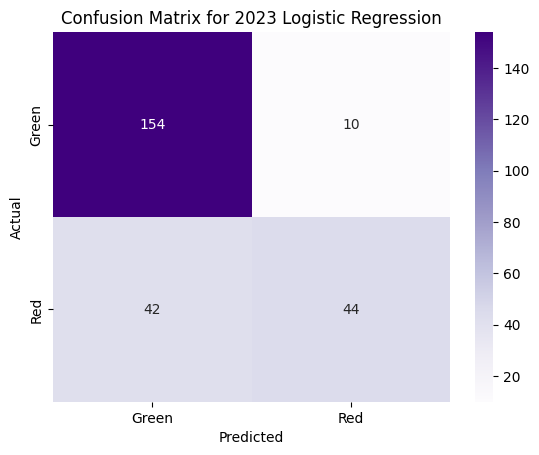

In [30]:
confusion_matrix_logreg = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix for 2023 Logistic Regression:")
print(confusion_matrix_logreg)

import seaborn as sns
sns.heatmap(confusion_matrix_logreg, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix for 2023 Logistic Regression')
plt.show()

##### **Solution - 4**

In [18]:
# Part 4: Calculate true positive rate (sensitivity) and true negative rate (specificity)
report = classification_report(y_test, y_test_pred, target_names=['Red', 'Green'], output_dict=True)
sensitivity = report['Green']['recall']  # True Positive Rate
specificity = report['Red']['recall']    # True Negative Rate
print(f"True Positive Rate (Sensitivity) for year 2: {sensitivity:.4f}")
print(f"True Negative Rate (Specificity) for year 2: {specificity:.4f}")

True Positive Rate (Sensitivity) for year 2: 0.5116
True Negative Rate (Specificity) for year 2: 0.9390


##### **Solution - 5**

In [19]:
# Part 5: Trading strategy based on year 2 labels and comparison with buy-and-hold strategy

# Initialize capital for both strategies
initial_capital = 100  # Starting with $100
buy_and_hold_return = (df_test['Adj Close'].iloc[-1] / df_test['Adj Close'].iloc[0]) * initial_capital

# Trading strategy based on predicted labels (buy for Green, hold cash for Red)
capital_strategy = initial_capital
for i in range(1, len(df_test)):
    if y_test_pred[i] == 'Green':
        # Simulate buying and holding till the end of the week
        capital_strategy *= (df_test['Adj Close'].iloc[i] / df_test['Adj Close'].iloc[i-1])

print(f"Buy-and-hold strategy return: ${buy_and_hold_return:.2f}")
print(f"Trading strategy based on logistic regression labels return: ${capital_strategy:.2f}")

if capital_strategy > buy_and_hold_return:
    print("The trading strategy based on logistic regression labels performs better.")
else:
    print("The buy-and-hold strategy performs better.")


Buy-and-hold strategy return: $35.24
Trading strategy based on logistic regression labels return: $24.92
The buy-and-hold strategy performs better.


**💡Conclusion kNN vs Logistic💡-**

The trading strategy based on k-NN labels performs better, where based on Logistic Regression buy-and-hold strategy performs better.

### **Part - 2 Banknotes: kNN & Logistic Regression**

##### **Solution - 1**

In [1]:
!pip install scikit-learn  # Install scikit-learn if you haven't already

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split # Import the train_test_split function


In [2]:
bn = pd.read_csv("data_banknote_authentication.csv")

In [3]:
bn.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
# Split the data into training and testing sets
train_bn, test_bn = train_test_split(bn, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Now you can proceed with your calculations
features = ['variance', 'skewness', 'curtosis', 'entropy']

In [7]:
# Calculate mean and standard deviation for each class in the training set
class_stats = train_bn.groupby('class')[features].agg(['mean', 'std'])

# Calculate mean and standard deviation for all training data
all_stats = train_bn[features].agg(['mean', 'std'])

# Create a summary table
summary_table = pd.DataFrame({
    'class': [0, 1, 'all'],
    'µ(f1)': [class_stats.loc[0, ('variance', 'mean')], class_stats.loc[1, ('variance', 'mean')], all_stats.loc['mean', 'variance']],
    'σ(f1)': [class_stats.loc[0, ('variance', 'std')], class_stats.loc[1, ('variance', 'std')], all_stats.loc['std', 'variance']],
    'µ(f2)': [class_stats.loc[0, ('skewness', 'mean')], class_stats.loc[1, ('skewness', 'mean')], all_stats.loc['mean', 'skewness']],
    'σ(f2)': [class_stats.loc[0, ('skewness', 'std')], class_stats.loc[1, ('skewness', 'std')], all_stats.loc['std', 'skewness']],
    'µ(f3)': [class_stats.loc[0, ('curtosis', 'mean')], class_stats.loc[1, ('curtosis', 'mean')], all_stats.loc['mean', 'curtosis']],
    'σ(f3)': [class_stats.loc[0, ('curtosis', 'std')], class_stats.loc[1, ('curtosis', 'std')], all_stats.loc['std', 'curtosis']],
    'µ(f4)': [class_stats.loc[0, ('entropy', 'mean')], class_stats.loc[1, ('entropy', 'mean')], all_stats.loc['mean', 'entropy']],
    'σ(f4)': [class_stats.loc[0, ('entropy', 'std')], class_stats.loc[1, ('entropy', 'std')], all_stats.loc['std', 'entropy']]
})

# Round the values to 2 decimal places
summary_table = summary_table.round(2)

# Display the table
summary_table

,class,µ(f1),σ(f1),µ(f2),σ(f2),µ(f3),σ(f3),µ(f4),σ(f4)
0,0,2.28,2.04,4.18,5.18,0.83,3.23,-1.16,2.13
1,1,-1.92,1.81,-1.21,5.42,2.36,5.31,-1.21,2.03
2,all,0.43,2.85,1.81,5.92,1.51,4.34,-1.18,2.09


**💡Interpretation of Table💡-**

**Variance (f1):** Authentic banknotes tend to have higher variance compared to fake banknotes. We can see the difference with the positive and negative mean variances.


**Skewness (f2):** Authentic banknotes generally have higher skewness than fake banknotes


**Curtosis (f3):** Authentic banknotes tend to have lower curtosis (more flat-topped distribution) compared to fake banknotes (more peaked distribution).


**Entropy (f4):** Authentic banknotes have slightly higher entropy (more randomness) than fake banknotes.

##### **Solution - 2: Simple Classifier**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
X = bn[['variance', 'skewness', 'curtosis', 'entropy']]
y = bn['class']

bn['color'] = bn['class'].map({0: 'green', 1: 'red'})

# Split the dataset into training (X_train) and testing (X_test)
X_train, X_test, y_train, y_test = train_test_split(bn[['variance', 'skewness', 'curtosis', 'entropy']], bn['class'], test_size=0.5, random_state=42)

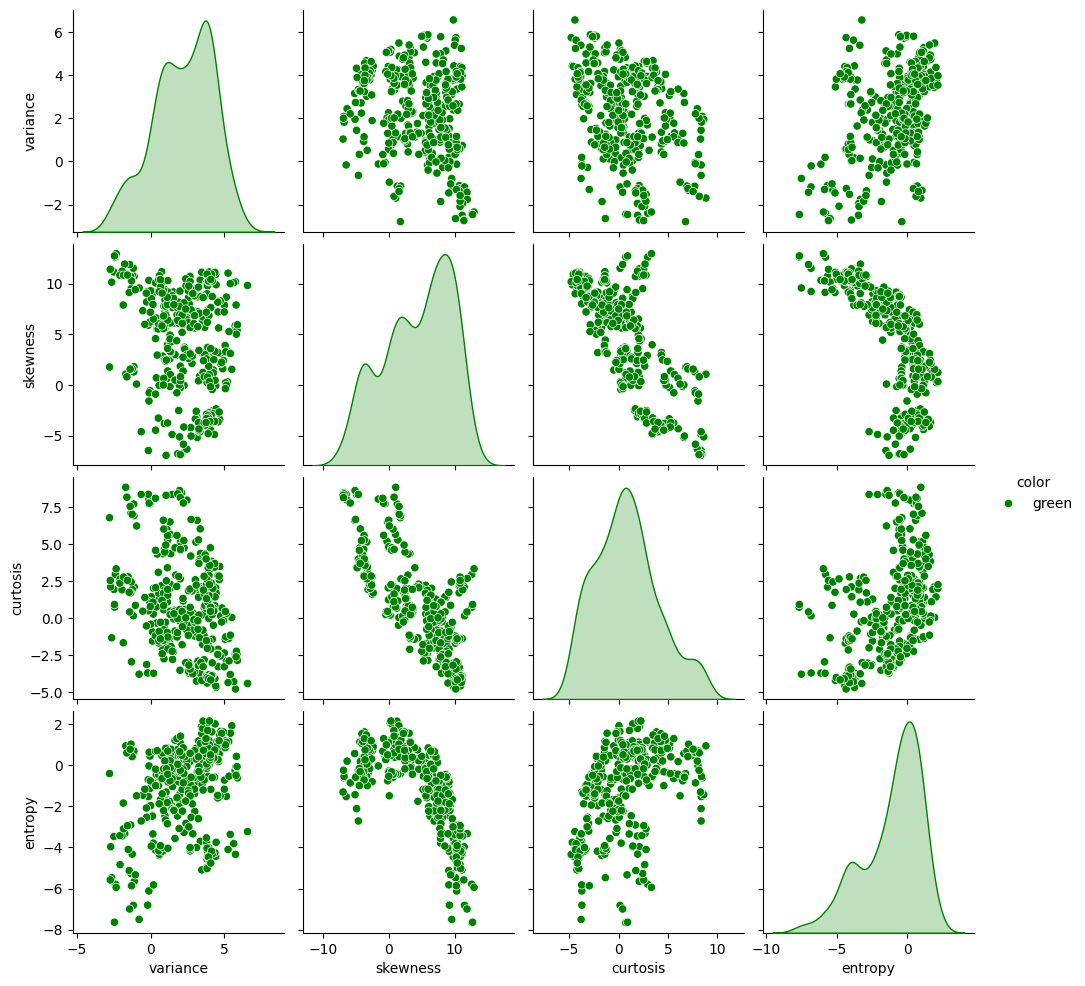

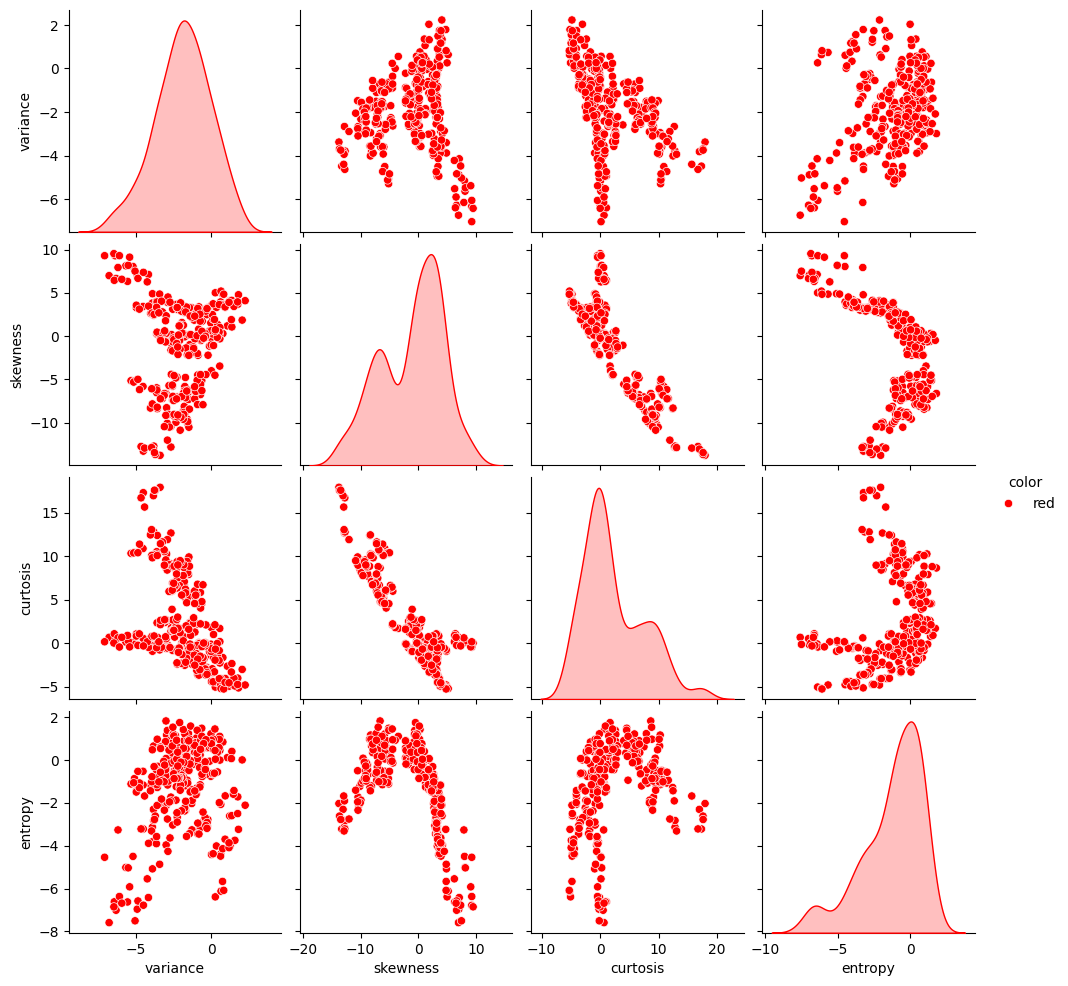

In [10]:
# Add the labels back into the training data for pairplot visualization
train_bn = X_train.copy()
train_bn['class'] = y_train
train_bn['color'] = y_train.map({0: 'green', 1: 'red'})

# Plot for good bills (green) - class 0
sns.pairplot(train_bn[train_bn['class'] == 0], vars=['variance', 'skewness', 'curtosis', 'entropy'], hue='color', palette={'green': 'green'})
plt.savefig('good_bills.pdf')

# Plot for fake bills (red) - class 1
sns.pairplot(train_bn[train_bn['class'] == 1], vars=['variance', 'skewness', 'curtosis', 'entropy'], hue='color', palette={'red': 'red'})
plt.savefig('fake_bills.pdf')

plt.show()


In [11]:
# Sample rule-based classifier
def simple_classifier(f1, f2, f3):
    if (f1 > -4) and (f2 > 6) and (f3 < 0):
        return 0  # Good bill (class 0)
    else:
        return 1  # Fake bill (class 1)

# Apply the classifier to the test set
X_test['predicted_class'] = X_test.apply(lambda row: simple_classifier(row['variance'], row['skewness'], row['entropy']), axis=1)

# Compare predicted classes with actual test labels
X_test['actual_class'] = y_test.values

# Compute accuracy
accuracy = (X_test['predicted_class'] == X_test['actual_class']).mean()
print(f'Classifier Accuracy: {accuracy * 100:.2f}%')


Classifier Accuracy: 68.95%


In [12]:
# Access the 'actual_class' column instead of 'class'
TP = ((X_test['predicted_class'] == 1) & (X_test['actual_class'] == 1)).sum()
FP = ((X_test['predicted_class'] == 1) & (X_test['actual_class'] == 0)).sum()
TN = ((X_test['predicted_class'] == 0) & (X_test['actual_class'] == 0)).sum()
FN = ((X_test['predicted_class'] == 0) & (X_test['actual_class'] == 1)).sum()
# Compute accuracy, TPR, and TNR
accuracy = (TP + TN) / (TP + FP + TN + FN)
TPR = TP / (TP + FN)  # Sensitivity, Recall
TNR = TN / (TN + FP)  # Specificity

# Print results
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
print(f'Accuracy: {accuracy:.2f}, TPR: {TPR:.2f}, TNR: {TNR:.2f}')

TP: 300, FP: 213, TN: 173, FN: 0
Accuracy: 0.69, TPR: 1.00, TNR: 0.45


In [13]:
import pandas as pd

results = pd.DataFrame([
    ["TP", f"{TP}"],
    ["FP", f"{FP}"],
    ["TN", f"{TN}"],
    ["FN", f"{FN}"],
    ["Accuracy", f"{accuracy:.2f}"],
    ["TPR (Sensitivity)", f"{TPR:.2f}"],
    ["TNR (Specificity)", f"{TNR:.2f}"]
], columns=["Metric", "Simple_Classifier"])  # Specify column names here

# Display the table
results

,Metric,Simple_Classifier
0,TP,300
1,FP,213
2,TN,173
3,FN,0
4,Accuracy,0.69
5,TPR (Sensitivity),1.00
6,TNR (Specificity),0.45


##### **Solution - 3 (use k-NN classifier using sklearn library)**

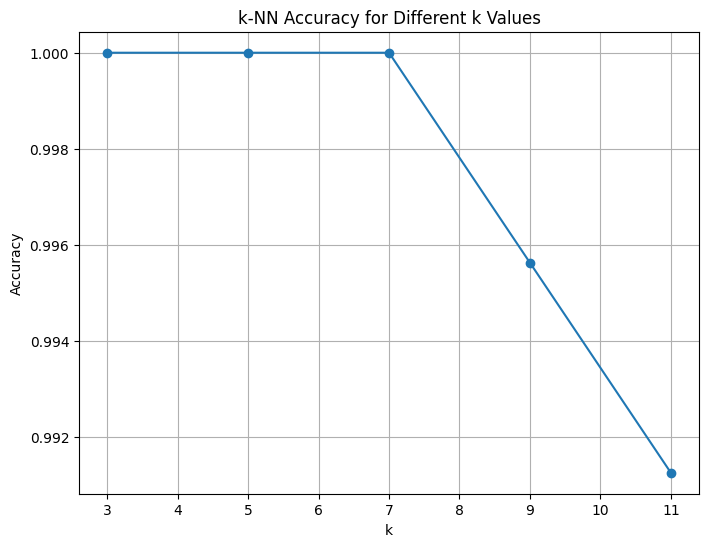

In [20]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Define k values
k_values = [3, 5, 7, 9, 11]

# Store accuracy for each k
accuracy_k = []

# Split the dataset again (50/50 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Iterate over k values and compute accuracy for each
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    accuracy_k.append(accuracy)

# Plot accuracy vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_k, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for Different k Values')
plt.grid(True)
plt.show()

In [21]:
# Identify the optimal k (max accuracy)
optimal_k = k_values[np.argmax(accuracy_k)]
print(f"Optimal value of k: {optimal_k}")

Optimal value of k: 3


In [19]:
# Train k-NN classifier with optimal k and evaluate performance
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

# Compute confusion matrix and performance measures for optimal k
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
TP, FP, TN, FN = cm_optimal[1, 1], cm_optimal[0, 1], cm_optimal[0, 0], cm_optimal[1, 0]

accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
TPR_optimal = TP / (TP + FN)  # Sensitivity (True Positive Rate)
TNR_optimal = TN / (TN + FP)  # Specificity (True Negative Rate)

# Update the results table
results['k-NN_Classifier'] = [TP, FP, TN, FN, f"{accuracy_optimal:.2f}", f"{TPR_optimal:.2f}", f"{TNR_optimal:.2f}"]

# Display updated results
results

,Metric,Simple_Classifier,k-NN_Classifier
0,TP,300,300
1,FP,213,0
2,TN,173,386
3,FN,0,0
4,Accuracy,0.69,1.00
5,TPR (Sensitivity),1.00,1.00
6,TNR (Specificity),0.45,1.00


In [22]:
x_buid = np.array([[1, 0, 9, 5]])

# Predict class using simple classifier
simple_classifier_pred = simple_classifier(x_buid[0, 0], x_buid[0, 1], x_buid[0, 2])
print(f"Predicted class using simple classifier: {simple_classifier_pred}")

# Predict class using optimal k-NN
knn_buid_pred = knn_optimal.predict(x_buid)
print(f"Predicted class using k-NN (k={optimal_k}): {knn_buid_pred[0]}")


Predicted class using simple classifier: 1
Predicted class using k-NN (k=3): 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**💡kNN vs Simple Classifier💡-**

The k-NN classifier outperforms the simple classifier across all measures, achieving perfect scores in accuracy, recall, and specificity.

##### **Solution - 4 Feature Selection**

In [23]:
from sklearn.metrics import accuracy_score

# Initialize a dictionary to store the accuracies for each scenario
accuracies = {}

# Get the optimal value of k (from your previous result)
optimal_k = 3  # Use your actual value of k here

# Features we will drop one at a time
feature_names = ['variance', 'skewness', 'curtosis', 'entropy']

# Loop over each feature, remove it, and train the classifier
for i, feature in enumerate(feature_names):
    # Drop the ith feature from X_train and X_test
    X_train_dropped = X_train.drop(columns=[feature])
    X_test_dropped = X_test.drop(columns=[feature])

    # Create a new k-NN classifier with optimal k
    knn = KNeighborsClassifier(n_neighbors=optimal_k)

    # Train the classifier on the truncated dataset
    knn.fit(X_train_dropped, y_train)

    # Predict class labels for the truncated X_test
    y_pred_dropped = knn.predict(X_test_dropped)

    # Compute accuracy for the truncated dataset
    accuracy_dropped = accuracy_score(y_test, y_pred_dropped)

    # Store the result in the dictionary
    accuracies[feature] = accuracy_dropped

# Print the accuracy results
for feature, accuracy in accuracies.items():
    print(f"Accuracy when {feature} is dropped: {accuracy:.2f}")


Accuracy when variance is dropped: 0.96
Accuracy when skewness is dropped: 0.98
Accuracy when curtosis is dropped: 0.98
Accuracy when entropy is dropped: 0.99


##### **Solution - 4.2**

**💡Interpretation of Results💡-**

Yes, the accuracy slightly increased to 0.99 when the feature entropy was dropped. This suggests that the entropy feature might not be crucial for classification, and the classifier performs better without it.

##### **Solution - 4.3**

**💡Interpretation of Results💡-**

The feature variance contributed the most to the loss of accuracy. When it was removed, the accuracy dropped to 0.96, which is the lowest among all cases. This implies that variance is an important feature for the classifier.

##### **Solution - 4.4**

**💡Interpretation of Results💡-**

The feature entropy contributed the least to the loss of accuracy. In fact, removing it slightly improved the accuracy to 0.99, suggesting that it might not be very important or could even be adding noise.


**💡Summary💡-**

Most important feature: Variance (removal caused the biggest accuracy drop).
Least important feature: Entropy

##### **Solution - 5 Test Logistic Classifier**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Split data (50/50 split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Step 1: Train logistic regression classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test)

# Step 2: Calculate performance measures
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
TP, FP, TN, FN = cm_logreg[1, 1], cm_logreg[0, 1], cm_logreg[0, 0], cm_logreg[1, 0]

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
TPR_logreg = TP / (TP + FN)  # Sensitivity (True Positive Rate)
TNR_logreg = TN / (TN + FP)  # Specificity (True Negative Rate)

# Update the results table
results['Logistic_Classifier'] = [TP, FP, TN, FN, f"{accuracy_logreg:.2f}", f"{TPR_logreg:.2f}", f"{TNR_logreg:.2f}"]

# Display updated results
results

,Metric,Simple_Classifier,k-NN_Classifier,Logistic_Classifier
0,TP,300,300,298
1,FP,213,0,4
2,TN,173,386,382
3,FN,0,0,2
4,Accuracy,0.69,1.00,0.99
5,TPR (Sensitivity),1.00,1.00,0.99
6,TNR (Specificity),0.45,1.00,0.99


In [30]:
# Step 4: Predict using the last 4 digits of your BUID
logreg_buid_pred = logreg.predict(x_buid)
print(f"Predicted class using Logistic Regression: {logreg_buid_pred[0]}")

# Compare with k-NN prediction
knn_buid_pred = knn_optimal.predict(x_buid)
print(f"Predicted class using k-NN (k={optimal_k}): {knn_buid_pred[0]}")

# Check if the predictions are the same
if logreg_buid_pred[0] == knn_buid_pred[0]:
    print("Logistic Regression and k-NN predictions are the same.")
else:
    print("Logistic Regression and k-NN predictions differ.")


Predicted class using Logistic Regression: 0
Predicted class using k-NN (k=3): 0
Logistic Regression and k-NN predictions are the same.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


##### **Solution - 6 Droping Features**

In [31]:
# Define feature names
features = ['variance', 'skewness', 'curtosis', 'entropy']

# Dictionary to store accuracies when removing each feature
accuracy_drop_feature = {}

# Function to train logistic regression after removing a feature
def train_logistic_regression_without_feature(removed_feature):
    # Drop the specified feature
    X_train_drop = X_train.drop(columns=[removed_feature])
    X_test_drop = X_test.drop(columns=[removed_feature])

    # Train logistic regression model
    logreg = LogisticRegression()
    logreg.fit(X_train_drop, y_train)

    # Predict on the truncated test data
    y_pred = logreg.predict(X_test_drop)

    # Compute accuracy
    return accuracy_score(y_test, y_pred)

# Iterate over each feature, remove it, and compute accuracy
for feature in features:
    accuracy_drop_feature[feature] = train_logistic_regression_without_feature(feature)

# Step 2: Display accuracy when each feature is removed
for feature, acc in accuracy_drop_feature.items():
    print(f"Accuracy when {feature} is removed: {acc:.2f}")

# Compare with accuracy when all features were used
accuracy_all_features = accuracy_logreg
print(f"Accuracy with all features: {accuracy_all_features:.2f}")

# Step 2: Did accuracy increase when removing any feature?
for feature, acc in accuracy_drop_feature.items():
    if acc > accuracy_all_features:
        print(f"Accuracy increased when {feature} was removed.")

# Step 3: Identify which feature removal resulted in the greatest accuracy drop
accuracy_loss = {feature: accuracy_all_features - acc for feature, acc in accuracy_drop_feature.items()}
max_loss_feature = max(accuracy_loss, key=accuracy_loss.get)
print(f"Feature contributing the most to accuracy loss: {max_loss_feature}")

# Step 4: Identify which feature removal resulted in the least accuracy drop
min_loss_feature = min(accuracy_loss, key=accuracy_loss.get)
print(f"Feature contributing the least to accuracy loss: {min_loss_feature}")

Accuracy when variance is removed: 0.81
Accuracy when skewness is removed: 0.91
Accuracy when curtosis is removed: 0.87
Accuracy when entropy is removed: 0.99
Accuracy with all features: 0.99
Feature contributing the most to accuracy loss: variance
Feature contributing the least to accuracy loss: entropy


**💡kNN vs Logistic Classifier💡-**

The relative significance of the features is consistent across both logistic regression and k-NN classifiers:

*   Variance is the most important feature in both models.
*   Entropy is the least important feature in both models.


However, the magnitude of the accuracy drop is more pronounced in logistic regression than in k-NN, indicating that logistic regression might rely more heavily on variance than k-NN does. This shows how different models can have similar rankings in feature importance, but differ in how they weigh the contributions of each feature.